# Feladatok a lineáris rendszerek témaköréből

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad
from scipy.interpolate import griddata
from PIL import Image

## 1. feladat

Bár a könyvtári függvénykészletben adott, mégis érdemes elkészíteni a saját konvolúció illetve a keresztkorrelációt számoló függvényeinket. Alkalmazza a saját implementációjú függvényeinket és a könyvtárilag adott függvényeket egy arra alkalmas jelre. Vesse össze a két megvalósítás eredményét.

# Impulzusok

In [3]:
#háromszög impulzus
def triangle_impulse(duration, amplitude):
    half_duration = duration / 2
    t = linspace(-half_duration, half_duration, 1000)
    triangle = amplitude * (1 - abs(t) / half_duration)
    return t, triangle

duration = 2  
amplitude = 1.0  

t, triangle_signal = triangle_impulse(duration, amplitude)

#négyszög impulzus
def boxcar_impulse(duration,amplitude):
    boxcar_signal = np.zeros_like(t)
    half_duration = duration / 2
    boxcar_signal[(t >= -half_duration) & (t <= half_duration)] = amplitude   
    boxcar_signal[0] = 0
    boxcar_signal[-1] = 0
    return boxcar_signal

square_signal = boxcar_impulse(2,1)

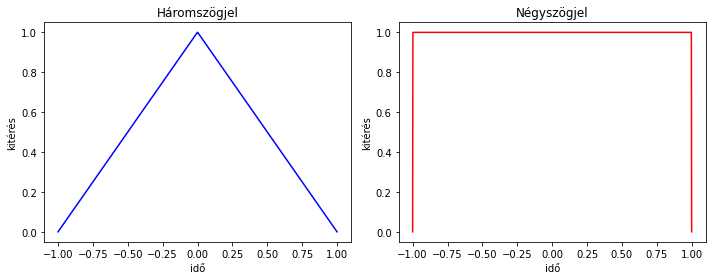

In [4]:
figure(figsize=(10, 4))  


subplot(1, 2, 1)  
plot(t, triangle_signal, color='b')
xlabel('idő')
ylabel('kitérés')
title('Háromszögjel')


subplot(1, 2, 2)  
plot(t, square_signal, color='r')
xlabel('idő')
ylabel('kitérés')
title('Négyszögjel')


tight_layout()  



plt.show()

# Hullámok

In [5]:
def square_wave(hz,length):
    t = linspace(0, length, 250, endpoint=True)
    y = signal.square(2 * np.pi * hz * t)
    return t,y

t2,y2 = square_wave(5,1)


def triangle_wave(hz, length):
    t = linspace(0, length, 250, endpoint=True)
    y = signal.sawtooth(2 * np.pi * hz * t, width=0.5)
    return t, y

t3, y3 = triangle_wave(5, 1)


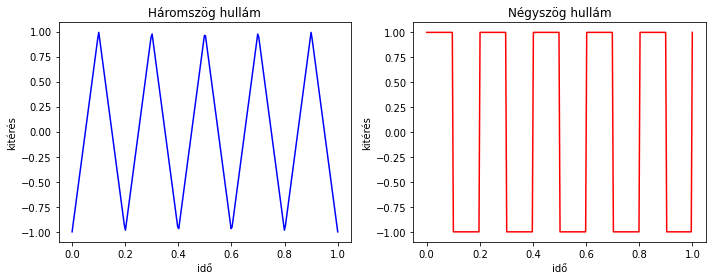

In [6]:
figure(figsize=(10, 4))  


subplot(1, 2, 1)  
plot(t3,y3, color='b')
xlabel('idő')
ylabel('kitérés')
title('Háromszög hullám')


subplot(1, 2, 2)  
plot(t2, y2, color='r')
xlabel('idő')
ylabel('kitérés')
title('Négyszög hullám')


tight_layout()  


plt.show()

# Konvolúció:

### Konvolúció kiszámítása könyvtárilag adott fügvényekkel:

In [7]:
libvalue = convolve(y2,y3, mode = "full")

### Konvolúció kiszámítása saját függvénnyel:

#### A konvolúció: $\left( a * v\right)_n = \underset{m = - \infty}{\overset{\infty}{\sum}}a_mv_{n-m}$

In [8]:
def ConvCalc(a,v):
    n = len(a) + len(v)-1 # -1 korrigálás az indexeléshez
    ConvResult = np.zeros(n)
    for n_index in range(n):
        for m_index in range(len(v)):
            if n_index - m_index >= 0 and n_index - m_index < len(a): #m index korlátozása a vizsgált tartományra
                ConvResult[n_index] += a[m_index]*v[n_index-m_index]
    return ConvResult     

In [9]:
Convolution = ConvCalc(y2,y3)

In [10]:
ERROR=abs(libvalue-Convolution)

Text(0.5, 1.0, 'A konvolúció függvények vizsgálata')

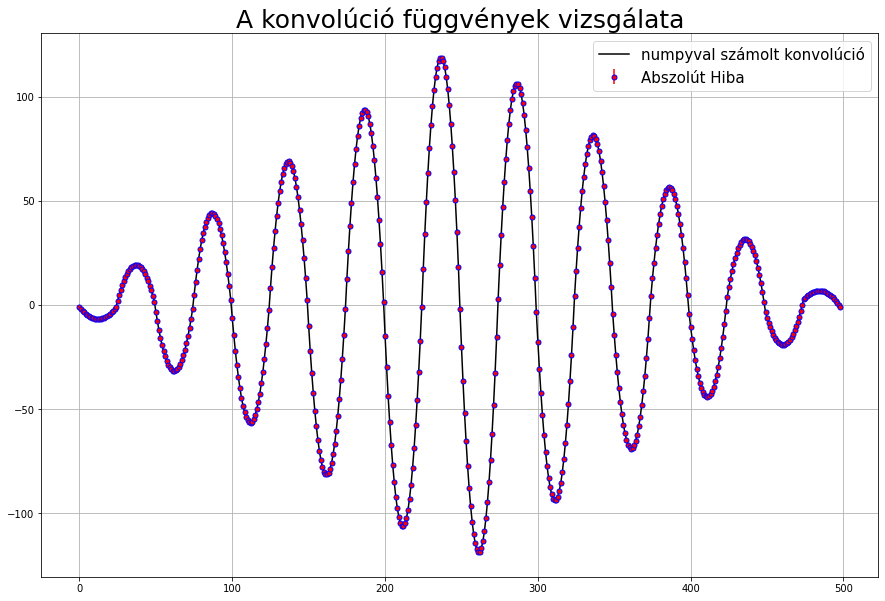

In [11]:
x = list(range(0,len(Convolution)))
figsize(15,10)
plot(x,libvalue, label = "numpyval számolt konvolúció", color = "black")
grid(True)
errorbar(x, libvalue, yerr=ERROR, fmt='.', label="Abszolút Hiba", color="red", alpha=1, markersize=10, markeredgecolor="blue")
legend(fontsize = 15)
title("A konvolúció függvények vizsgálata", size = 25)

Text(0.5, 1.0, 'Nagyított verzió')

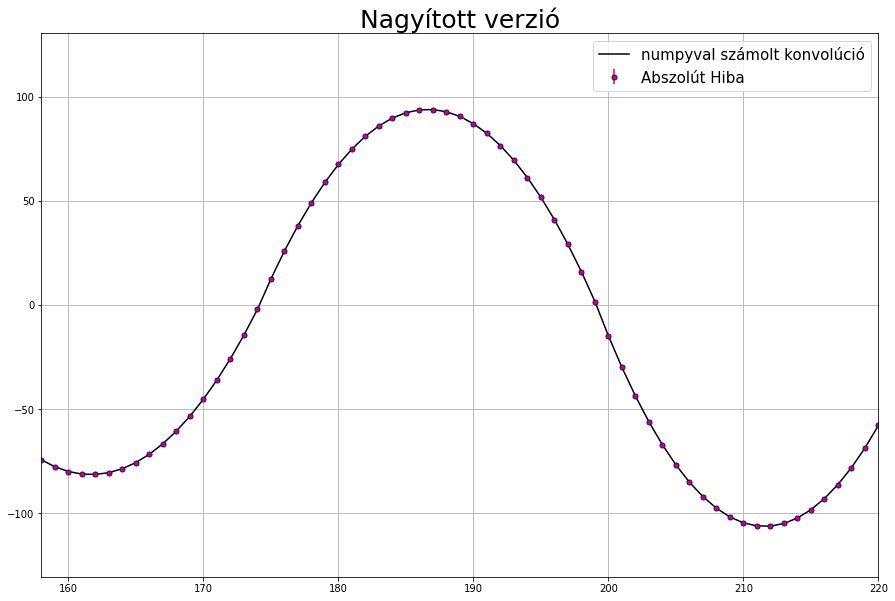

In [12]:
x = list(range(0,len(Convolution)))
figsize(15,10)
plot(x,libvalue, label = "numpyval számolt konvolúció", color = "black")
grid(True)
errorbar(x, libvalue, yerr=ERROR, fmt='.', label="Abszolút Hiba", color="red", alpha=1, markersize=10, markeredgecolor="blue")
legend(fontsize = 15)
xlim(158,220)
title("Nagyított verzió",size = 25)

A második ábrán kivágtam egy kisebb részletet az eredeti ábrából, hogy a hibákat jobban szemügyre vehessem. Örömmel tapasztaltam, hogy olyan kis abszolút hibák jelennek meg, hogy az error bár szinte csak pontként jelenik meg. 

# Korreláció:

### Korreláció kiszámítása könyvtárilag adott fügvényekkel:

In [13]:
libvalue2 = correlate(y2,y3, mode = "full")

### Korreláció kiszámítása saját függvénnyel:

#### A korreláció: $c_k = \underset{n}{\sum}a_{n+k}v_{n}$

In [14]:
def CorrCalc(a, v):
    k = len(a) + len(v) - 1  # -1 korrigálás az indexeléshez
    CorrResult = zeros(k)
    for k_index in range(k):
        for n_index in range(len(v)):
            if k_index - n_index >= 0 and k_index - n_index < len(a):  # m index korlátozása a vizsgált tartományra
                CorrResult[k_index] += a[k_index - n_index] * v[n_index]
    return CorrResult


In [15]:
Correlation = CorrCalc(y2,y3)
ERROR2=abs(libvalue2-Correlation)

Text(0.5, 1.0, 'A korrelációs függvények vizsgálata')

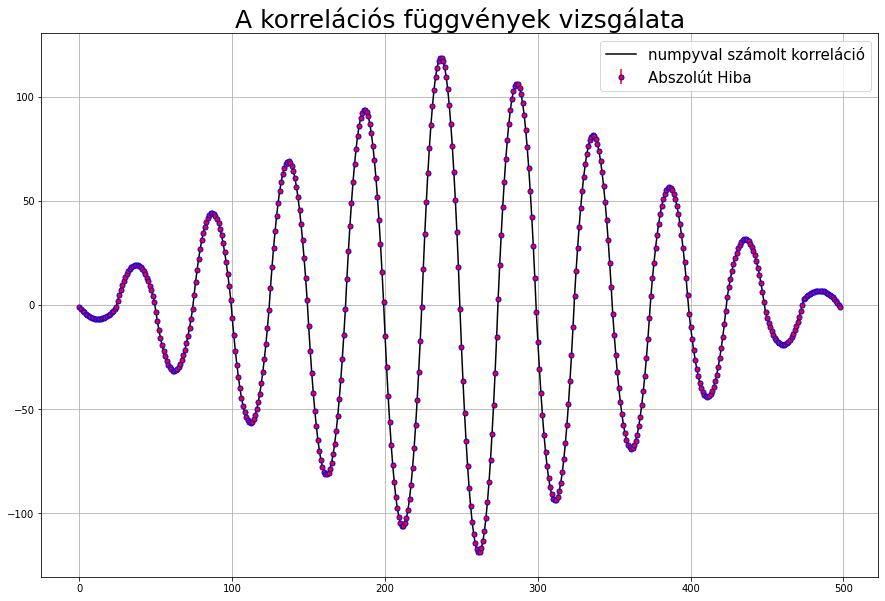

In [16]:
x = list(range(0,len(Correlation)))
figsize(15,10)
plot(x,libvalue2, label = "numpyval számolt korreláció", color = "black")
grid(True)
errorbar(x, libvalue2, yerr=ERROR2, fmt='.', label="Abszolút Hiba", color="red", alpha=1, markersize=10, markeredgecolor="blue")
legend(fontsize = 15)
grid(True)
title("A korrelációs függvények vizsgálata", size = 25)

Text(0.5, 1.0, 'Nagyított verzió')

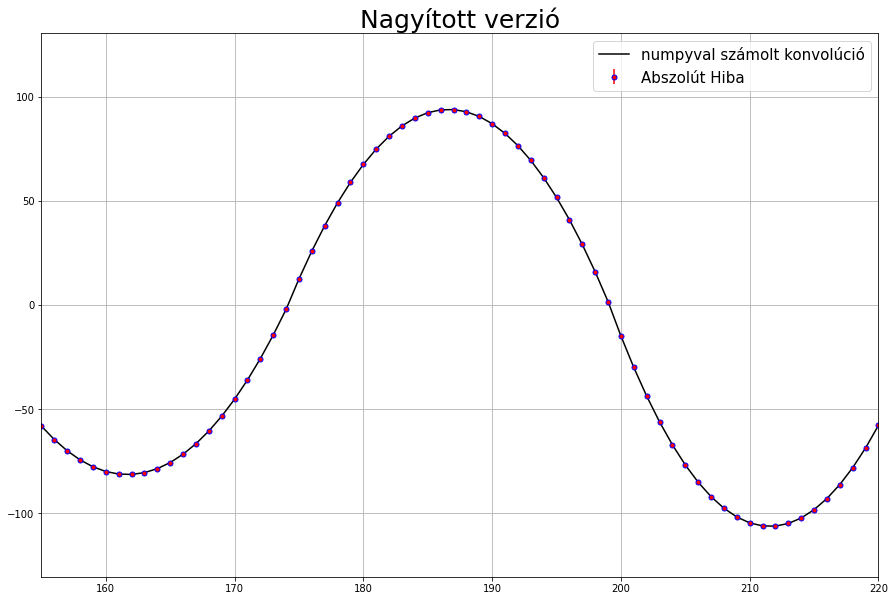

In [17]:
x = list(range(0,len(Convolution)))
figsize(15,10)
plot(x,libvalue2, label = "numpyval számolt konvolúció", color = "black")
grid(True)
errorbar(x, libvalue2, yerr=ERROR2, fmt='.', label="Abszolút Hiba", color="red", alpha=1, markersize=10, markeredgecolor="blue")
legend(fontsize = 15)
xlim(155,220)
title("Nagyított verzió",size = 25)

## 2. feladat

Legyen adott két folytonos időfüggvény: $x(t) = u(t) - u(t - 3)$ és $g(t) = e^{-0.5t} u(t)$, ahol $u(t)$ az egységugás 0-ban.

* Vezesse le analitikusan a két jel konvolúciójának ($g\star u$-nak) a függvényalakját!
* A `convolve` metódus segítségével közelítőleg számolja ki a fenti függvényt. A mintavételezés időköze legyen $\Delta t=0.1$. A mintavételezést a $x[n] := x(n\Delta t)$ definíció írja le.
* Készítsen ábrát, amin jól látszik az analitikus függvény grafikonja és a numerikus közelítés alakja.
* Mi történik, ha $\Delta t$-t csökkenti?


In [18]:
def timecreator(also,felso,lepes):
    param = (felso-also)/lepes #azért csináltam, hogy garantáltan szereplejen nulla az idő listákban
    elsotag = list(linspace(also,0,int(lepes/2),endpoint=True))
    masodiktag = list(linspace(0+param,felso,int(lepes/2)),)
    final = array(elsotag+masodiktag)
    return final

In [19]:
t = timecreator(-10,10,500)

In [20]:
def u(t): #1 pontban számolja ki
    if t == 0: #ezért kellett a timecreator, hogy ilyen feltételeket szabhassak
        y = 0.5
    if t > 0:
        y = (1)
    if t < 0:
        y = 0
    return y

In [21]:
def ucreator(t):#függvényt csinál belőle
    yvalues = []
    for time in t:
        yvalues.append(u(time))
    yvalues = array(yvalues)
    return yvalues
        
    

Text(0.5, 1.0, 'u(t) egységugrás')

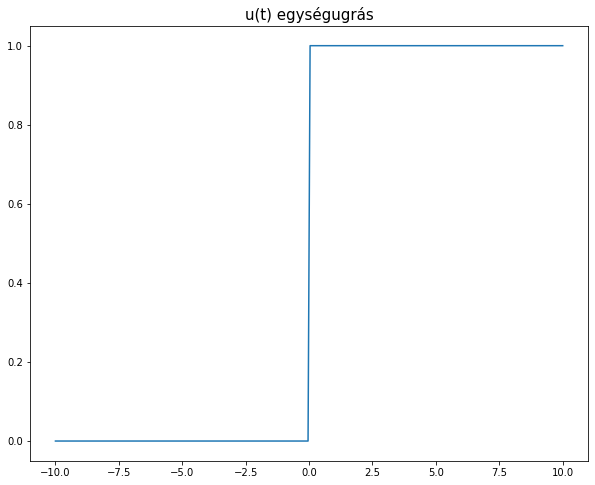

In [22]:
figsize(10,8)
unit = ucreator(t)
plot(t,unit)
title("u(t) egységugrás", size = 15)

In [23]:
def x(t):
    return u(t) - u(t-3)

In [24]:
def xcreator(t):
    return ucreator(t) - ucreator(t-3) 

In [25]:
iksz = xcreator(t)

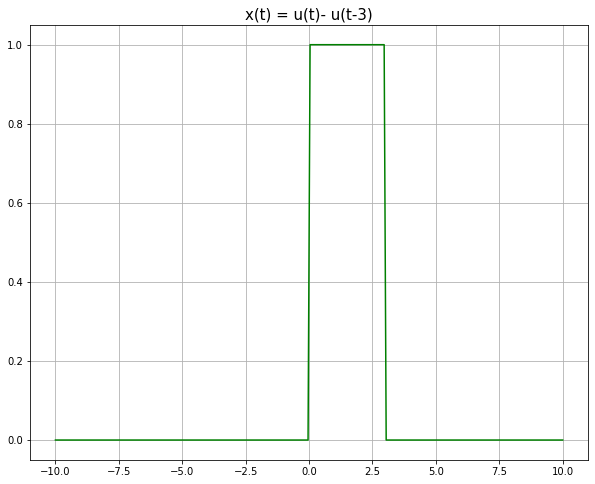

In [26]:
plot(t,iksz, color = "green")
title("x(t) = u(t)- u(t-3)", size = 15)
grid(True)

In [27]:
def g(t):
    return e**(-0.5*t)*u(t)

In [28]:
def gcreator(t):
    return e**(-0.5*t)*ucreator(t)

In [29]:
gt = gcreator(t)

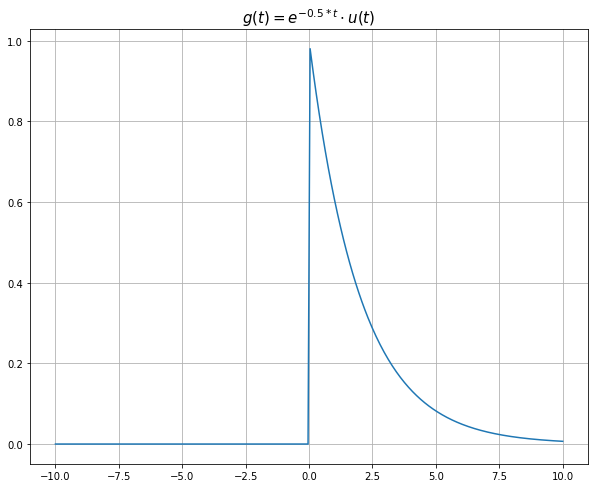

In [30]:
plot(t,gt)
title(r"$g(t) = e^{-0.5*t}\cdot u(t)$", size = 15)
grid(True)

 # a, feladatrész
 
 * $x(t) = u(t)- u(t-3)$
 * $g(t) = e^{-0.5\cdot t}\cdot u(t)$
 
 

### Az $x(t) * g(t)$ konvolúciója:
 
 $(x * g)(t) = \int_{-\infty}^{\infty} x(\tau)g(t-\tau) d\tau$
. Mivel mindkét függvény csak az 0-tól 3-ig terjedő tartományban nem nulla, az integrálás 0 és 3 között fog történni.

$(x * g)(t) = \int_{0}^{3} [u(\tau) - u(\tau - 3)][e^{-0.5(t-\tau)}u(t-\tau)] d\tau$.

Az első négyszögletes tag egy éppen egy boxcar impulzust képez, pont a (0,3) intervallumon (zöld vonalas ábra), így az integrálja 1 lesz. Továbbá diszkrét minta vételezésű jelről beszélünk, így a képlet:
$(x * g)(t) = \underset{n}{\sum} e^{-0.5(t-\tau)}u(t-\tau) $




# b, feladatrész

Text(0.5, 1.0, 'A két jel konvolúciója, a numpy csomag segítségével')

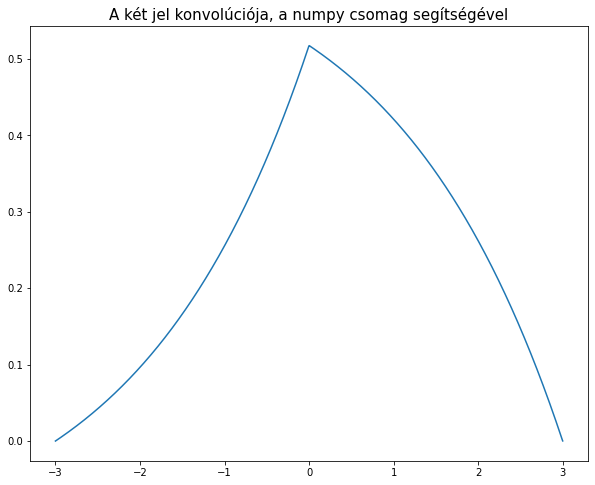

In [31]:
t = linspace(0,3,1000)
y = convolve(xcreator(t),gcreator(t),mode ="full")
y /= len(t)
convol_t = linspace(-3,3,len(y))
plot(-convol_t,y) 
title("A két jel konvolúciója, a numpy csomag segítségével", size = 15)

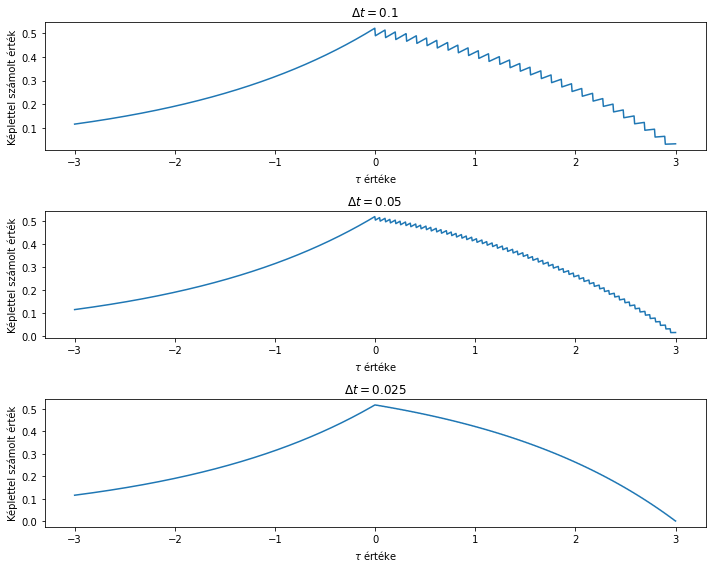

In [32]:
#képlettel
dt = 0.1
t = linspace(0,3,int(3/dt)) #a harmadik paraméterrel határoztam meg dt lépésméretet
tau_values = linspace(-3, 3, 1000)  #tolásokat úgy válaszottam meg, mintha egy mode ="full" konvolúciót végeznénk

# Kifejezés kiszámítása minden tau-ra és összegzése
resultsdt1 = []

for tau in tau_values:
    expression = np.sum(exp(-0.5 * (t - tau)) * (t >= tau)) #(t >= tau) csak azokat az eseteket vettem figyelembe amikor t>0 ilyenkor a
    resultsdt1.append(expression)  # szorzó tényező 1, máskülönben nulla.
resultsdt1 = array(resultsdt1) / len(t) #visszanormáltam őket

dt = 0.05 # megfeleztem
t = linspace(0,3,int(3/dt))
resultsdt2 = []
for tau in tau_values:
    expression = np.sum(exp(-0.5 * (t - tau)) * (t >= tau))
    resultsdt2.append(expression)
resultsdt2 = array(resultsdt2) / len(t)
    

dt = 0.0025 # megfeleztem
t = linspace(0,3,int(3/dt))
resultsdt3 = []
for tau in tau_values:
    expression = np.sum(exp(-0.5 * (t - tau)) * (t >= tau))
    resultsdt3.append(expression)
resultsdt3 = array(resultsdt3) / len(t)






subplot(3, 1, 1)
plot(tau_values, resultsdt1)
xlabel(r'$\tau$ értéke')
ylabel('Képlettel számolt érték')
title(r'$\Delta t = 0.1$')


subplot(3, 1, 2)
plot(tau_values, resultsdt2)
xlabel(r'$\tau$ értéke')
ylabel('Képlettel számolt érték')
title(r'$\Delta t = 0.05$')



subplot(3, 1, 3)
plot(tau_values, resultsdt3)
xlabel(r'$\tau$ értéke')
ylabel('Képlettel számolt érték')
title(r'$\Delta t = 0.025$')
tight_layout()

Az a tapasztalatom, hogy minél jobban sűrítjük a mintavételezést, annál jobban letisztul az ábránk. Véletlen g és u, helyett g és x-et vezettem le.

$(u * g)(t) = \int_{0}^{3} [u(\tau)][e^{-0.5(t-\tau)}u(t-\tau)] d\tau$.

## 3. feladat

Határozza meg analitikus számolással az $f(x) = A\sin(\omega x + \phi)$ függvény autokorrelációs függvényét. Közelítse $f(x)$ időfüggvényt $f[n]$ egyenletesen mintavételezett sorozattal, és ellenőrizze
az eredményt numerikusan. 

* Generáljon a `randn()` függvény segítségével zajt és vizsgálja meg annak spektrumát. 
* Keverje az eredeti jelhez ezt a zajt, és próbálja megbecsülni az eredeti jel periódusát.

In [33]:
def f(x,A,omega,phi):
    return A*sin(omega*x+phi)

x = linspace(0,20,1000)
A = 1
omega = 1 #példa értékek
phi = 0

periodus = 2 * np.pi / omega
print(periodus)

f1 = f(x,A,omega,phi) 


6.283185307179586


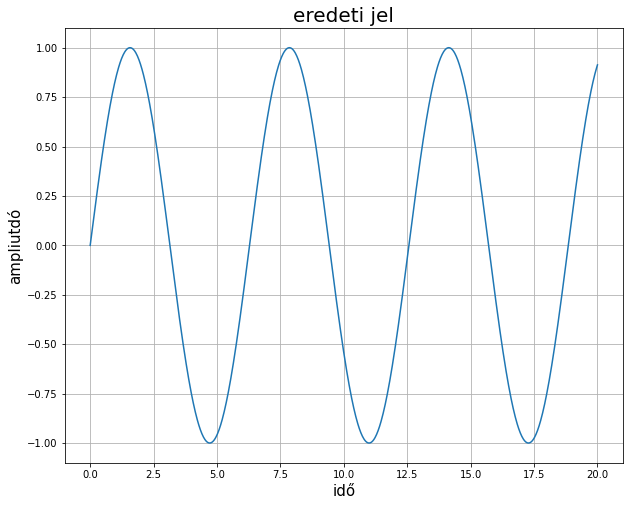

In [34]:
plot(x,f1)
title("eredeti jel", size = 20)
xlabel("idő",size =15)
ylabel("ampliutdó",size = 15)
grid(True)

In [35]:
minta_hossza = len(x)
lag_tartomany = linspace(0, x, minta_hossza)  #ezen mozgatjuk el
autokorrelacio = np.zeros_like(lag_tartomany)

for i, tau in enumerate(lag_tartomany):
    autokorrelacio[i] = np.trapz(f(x, A, omega, phi) * f(x + tau, A, omega, phi), x)#np.trapz adott tengely mentén számol integrált

autokorrelacio = - autokorrelacio
autokorrelacio /= minta_hossza #normálom


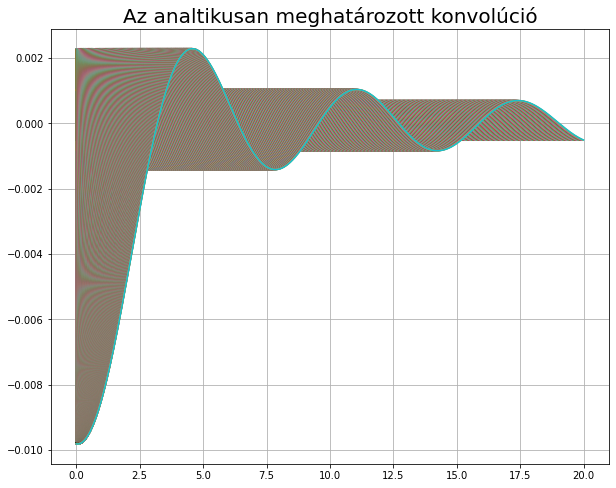

In [36]:
plot(lag_tartomany,autokorrelacio)
title("Az analtikusan meghatározott konvolúció", size = 20)
grid(True)

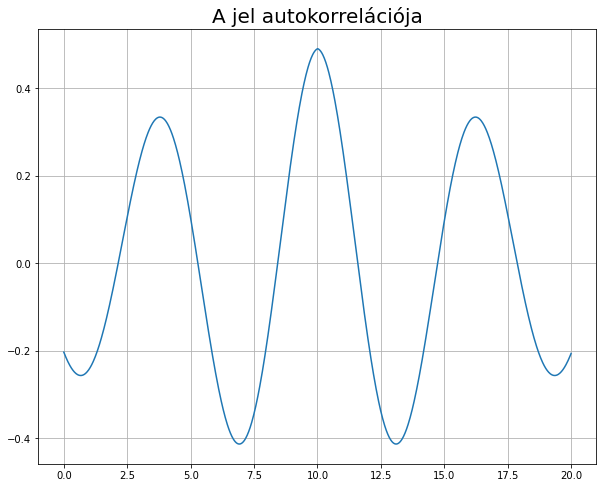

In [37]:
t_plotter = linspace(0,20,1000)
korr = correlate(f1,f1, mode = "same")
korr /= len(t_plotter) #normálás
plot(t_plotter,korr)
title("A jel autokorrelációja",size = 20)
grid(True)

Text(0.5, 1.0, 'Generált fehzérzaj')

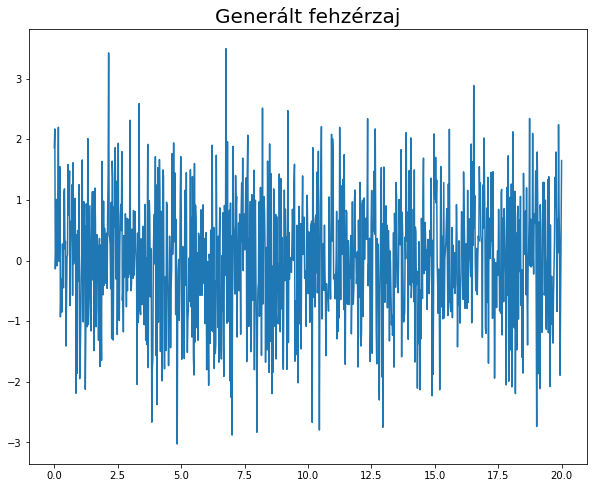

In [38]:
minta_hossza = 1000
feher_zaj = random.randn(minta_hossza)
plot(x,feher_zaj)
title("Generált fehzérzaj", size = 20)

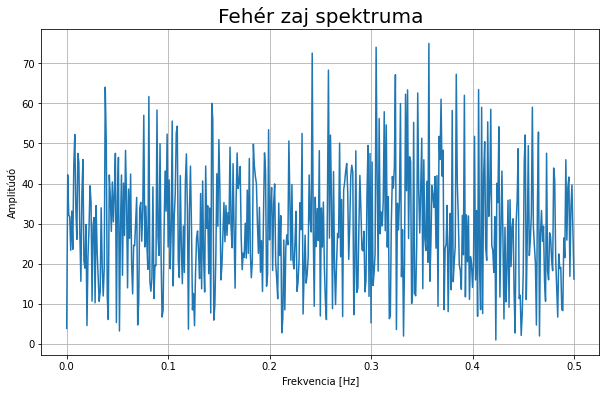

In [39]:
spektrum = np.fft.rfft(feher_zaj) 
frekvenciak = np.fft.rfftfreq(minta_hossza)


amplitudo_spektrum = np.abs(spektrum)


figure(figsize=(10, 6))
plot(frekvenciak, amplitudo_spektrum)
title("Fehér zaj spektruma", size=20)
xlabel("Frekvencia [Hz]",size = 10)
ylabel("Amplitúdó",size =10)
grid()
show()

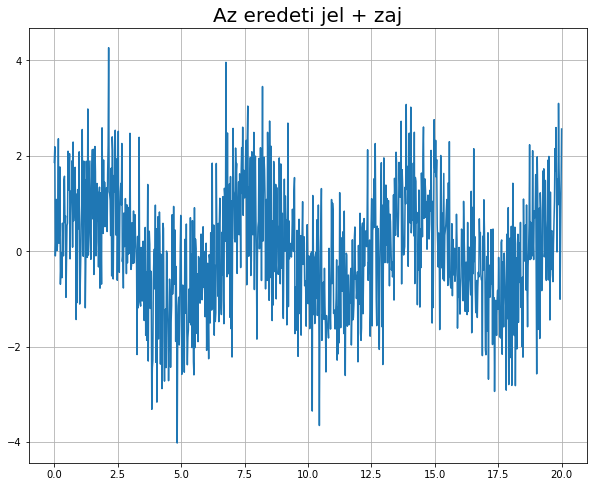

In [40]:
jel2 = f1 + feher_zaj
plot(x,jel2)
title("Az eredeti jel + zaj", size = 20)
grid(True)

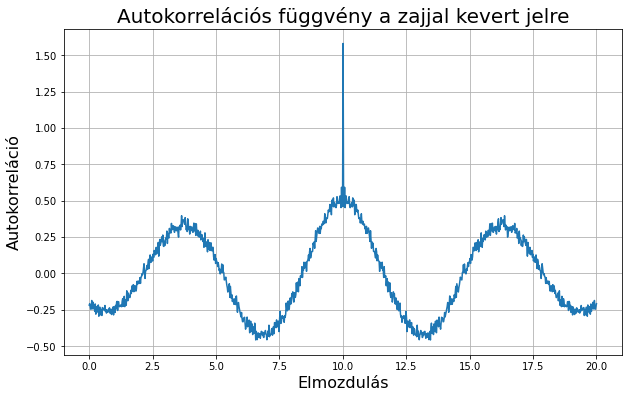

In [41]:
autokorrelacio_jel2 = correlate(jel2, jel2, mode='same') #biztosra mentem inkább és az előre megírt fügvénnyel számoltam ki az autókorrelációt
autokorrelacio_jel2 /= len(x)

figure(figsize=(10, 6))
plot(t_plotter, autokorrelacio_jel2)
title("Autokorrelációs függvény a zajjal kevert jelre", size=20)
xlabel("Elmozdulás", size=16)
ylabel("Autokorreláció", size=16)
grid()
show()


## 4. feladat

Gondolatban gyűjtsünk mintát egy visszhangos közegben. A visszhangot modellezhetjük a $j(t) = f(t) +
A_1f(t-d_1) + A_2f(t-d_2)$ kifejezéssel, ahol $A_i$ a csillapításoknak, $d_i$ a késleltetéseknek feleltethetőek meg. 

Vezesse le a modell autokorrelációs függvényét. 

Legyen a vizsgálójel fehér zaj és az autokorrelogram elemzésével próbálja megállapítani a modell paramétereit!

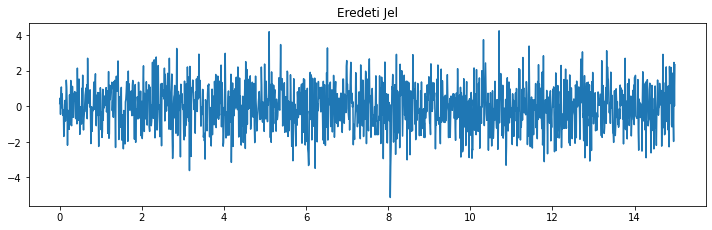

In [17]:
#jel_t = linspace(0,10,1000)
A1 = 0.7  #példa
d1 = 2
A2 = 0.4  
d2 = 4
dt = .01
T=15
N=int(T//dt)
jel_t = dt*arange(N)

i1 = int(d1//dt)
i2 = int(d2//dt)

f_t = np.random.normal(0, 1, N)
f1=A1*f_t[:-i1]
f2=A2*f_t[:-i2]
im=max(i1,i2)

f_t[i1:]+=f1
f_t[i2:]+=f2
# Visszhang létrehozása
#j_t = f_t + A1 * np.roll(f_t, d1) + A2 * np.roll(f_t, d2)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(jel_t, f_t)
plt.title('Eredeti Jel')
#plt.subplot(2, 1, 2)
#plt.plot(jel_t, j_t)
#plt.title('Visszhangos Jel')
plt.tight_layout()
plt.show()


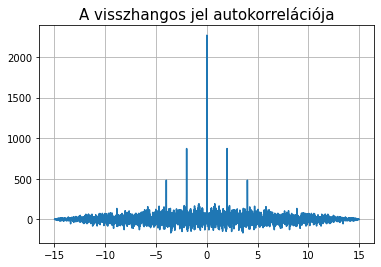

In [18]:
visszkor = correlate(f_t,f_t,mode="full")
plot(dt*arange(1-N,N),visszkor)
title("A visszhangos jel autokorrelációja",size = 15)
plt.grid()

## 5. feladat

Gondolatban építse fel ideális ellenállás, kapacitás és induktivitás segítségével az alábbi szűrőhálózatot:

<img src='rlc.png' alt='r_over_rlc'>

* Ábrázolja a hálózat Bode- és Nyquist-diagramjait!
* Mi ennek a hálózatnak az impulzusra adott válasza? (Vezesse le a hálózat differenciál egyenleteire támaszkodva.)
* Legyen a hálózat bemenetén négyszögjel. Válassza meg úgy ennek periódusidejét, hogy a hálózatra jellemző $\tau$ időállandóval
    * megyegyezzen,
    * legyen kisebb, pl $0.2\tau$
    * legyen nagyobb, pl $5\tau$.

Határozza meg a válaszfüggvényeket mind az időben mind a frekvenciatérben számolva.

## megoldás: 
A feladatban egy másodrendű aluláteresztő szűrőt (second order LFP), fogunk vizsgálni. Ez azt jelenti, hogy csak az olyan jeleket engedi át, melyek kisebb frekvenciával rendelkeznek, mint a rendszer karakteriszitkájából adódó: $f_c = \frac{1}{2\pi} \frac{1}{RC} = \frac{1}{2\pi}\frac{1}{\tau}$ cut-off frekvencia, továbbá így arra is fényderült, hogy a szűrőt jellemző $\tau$ időállandó éppen a: $\tau = RC$ szorzatból adódik.


#### Bode diagram: 
"Egy bemenetű, egy kimenetű rendszer átviteli karakterisztikájának ábrázolására szolgál. A diagram részét alkotó két részdiagram az átviteli karakterisztika amplitúdóját illetve fázisát ábrázolja a frekvencia függvényében."

Átviteli függvény: H($j\omega$) = $\frac{1}{1 + j \frac{\omega}{\omega_c}} = \frac{1}{1 + j\omega \tau} = \frac{1}{1 + j\omega RC}$

$\textbf{Az amplitudó ábrájához:}$ előszőr is vennem kell az átviteli függvény abszolút értékét. Majd némi átalakítást követően (decibelre váltva): $A_{dB} = - 10  log \left(1 + \frac{\omega ^2}{\omega_c^2}\right)$


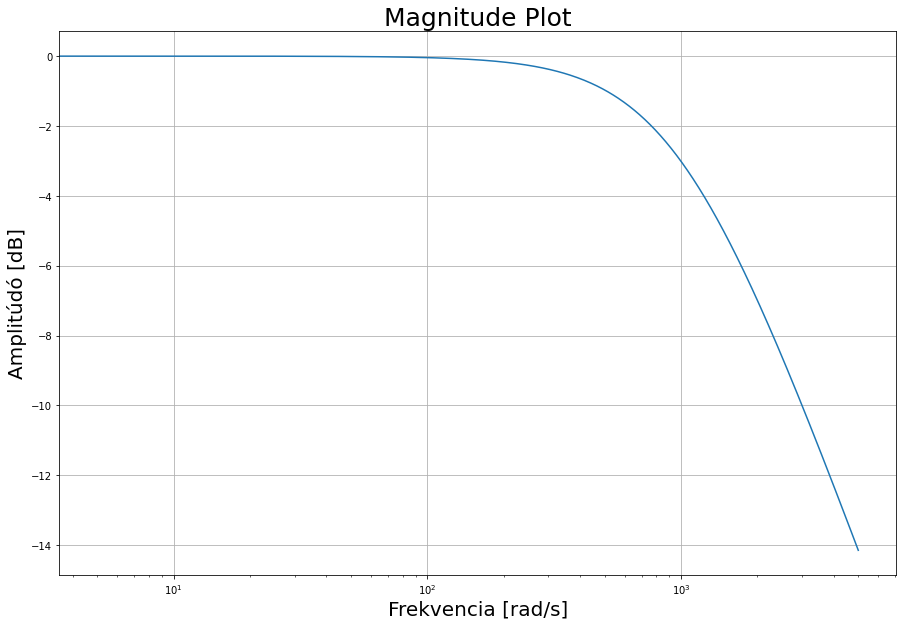

In [44]:
ωc = 1000  #példa érték
freq = linspace(0, 5000, 1000)
A_dB = -10 * np.log10(1 + (freq**2 / ωc**2)) 
figure(figsize=(15, 10))
semilogx(freq, A_dB) #frekvenciát logaritmikusan skálázzuk
xlabel('Frekvencia [rad/s]', size = 20)
ylabel('Amplitúdó [dB]', size = 20)
grid(True)
title('Magnitude Plot', size = 25)
show()

$\textbf{A fázisábrát}$ pedig a következő képlettel kaphatjuk meg:  H(j$\omega$) = $- tan^{-1}\frac{\omega}{\omega_c}$ 

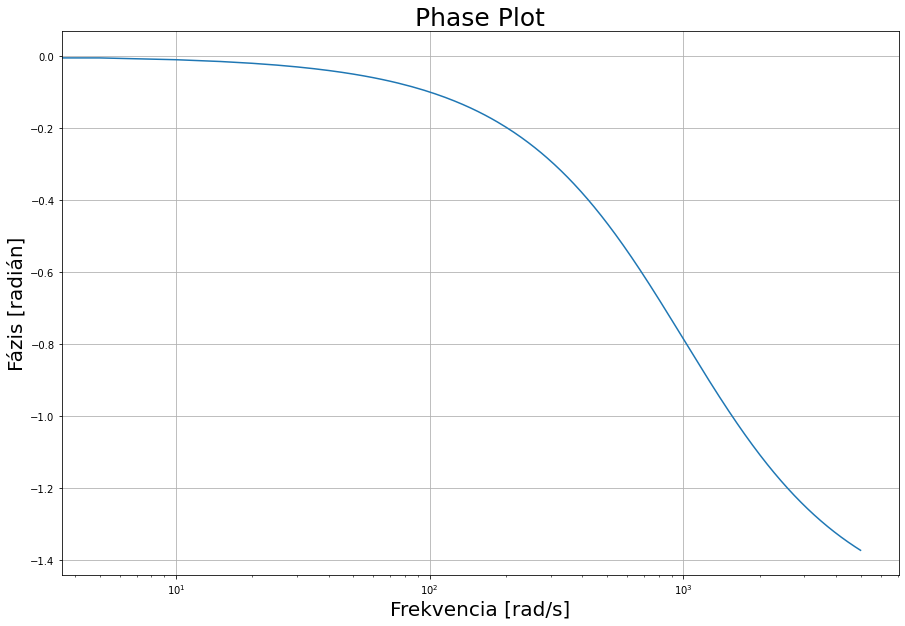

In [45]:
phase = -np.arctan(freq / ωc)

# Fázisdiagram
figure(figsize=(15, 10))
semilogx(freq, phase)
xlabel('Frekvencia [rad/s]', size =20)
ylabel('Fázis [radián]',size = 20)
grid(True)
title('Phase Plot',size =25)
show()


# Nyquist-diagramok

"the real part of the transfer function is plotted on the X-axis while the imaginary part is plotted on the Y-axis"  

Text(0, 0.5, 'Átivteli függvény imaginárius érétkei')

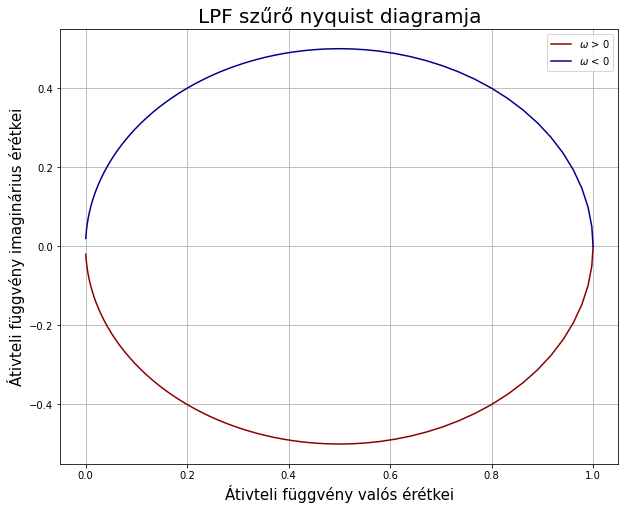

In [46]:
positive_values = np.empty(len(freq), dtype=np.complex_)
negative_values = np.empty(len(freq), dtype=np.complex_)
tau = 10e-3 #tau = 1/omega
current_iter = 0
while(current_iter < len(freq)):
        
    positive_values[current_iter] = (1/(1 + 1j * freq[current_iter] * tau)) #a fentebb levezetett képletek alapján
    negative_values[current_iter] = (1/(1 + 1j * -freq[current_iter] * tau))
    current_iter += 1
    
plot(positive_values.real,positive_values.imag, color = "darkred", label = r"$\omega$ > 0")
plot(negative_values.real,negative_values.imag, color ="darkblue", label = r"$\omega$ < 0")
grid(True)
legend()
title("LPF szűrő nyquist diagramja", size =20)
xlabel("Átivteli függvény valós érétkei", size =15)
ylabel("Átivteli függvény imaginárius érétkei", size =15)

## Vizsgálat négyszögjellel:

$V(j\omega) = I(j\omega)H(j\omega)$

Ahol V az output, I az input, és H az átviteli függvény

In [47]:
def LPF(tau, input_signal, freq):
    
    output_vals = np.empty(freq.size, dtype=np.complex_)
    
    current_iter = 0
    while current_iter < freq.size:
        
        output_vals[current_iter] = (1 / (1 + 1j * freq[current_iter] * tau)) * input_signal[current_iter] #szintén az elején definiált képlet, valamint az újonnan definált szorzat alapján
    
        current_iter += 1
        
    return output_vals


In [48]:
def square_wave(hz,length):
    t = linspace(0, length, 1000, endpoint=True)
    y = signal.square(2 * pi * hz * t)
    return t,y

Az egyes feladatban definált négyszögjelet hívtam ismét segítségül.

In [49]:
freqs = 1/tau #T = tau
freqs2 = 1/tau * 0.2 # T = tau*0.2 
freqs3 = 1/tau * 5 #T = tau * 5
length = 10
time1, input1 = square_wave(freqs,length)
time2, input2 = square_wave(freqs2,length)
time3, input3 = square_wave(freqs3,length)

In [50]:
tkozepes = LPF(tau,input1,freq)
tkicsi = LPF(tau,input2,freq)
tnagy = LPF(tau,input3,freq)

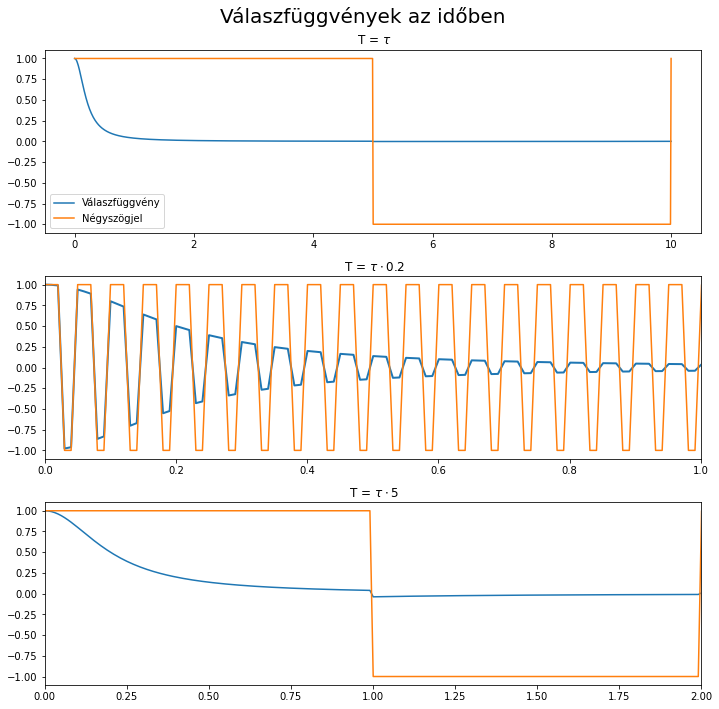

In [51]:
figure(figsize=(10, 10))
suptitle("Válaszfüggvények az időben", size = 20)
subplot(3, 1, 1)
plot(time1,tkozepes.real,label= "Válaszfüggvény")
plot(time1,input1, label ="Négyszögjel")
title(r" T = $\tau$")
legend()

subplot(3, 1, 2)
plot(time2,tkicsi.real,lw = 2)
plot(time2,input2)
title(r" T = $\tau \cdot 0.2$")
xlim(0,1)
subplot(3, 1, 3)
plot(time3,tnagy.real)
plot(time3,input3)
title(r" T = $\tau \cdot 5$")
xlim(0,2)
xlim
plt.tight_layout()
plt.show()

# források:

* https://www.electronics-tutorials.ws/filter/filter_2.html - Meaning of cut-off frequency
* https://www.electronics-tutorials.ws/filter/second-order-filters.html - value of cut-off frequency
* https://www.wikilectures.eu/w/Time_constant_and_filters - value of time constant
* https://hu.wikipedia.org/wiki/Bode-diagram - Bode diagram
* https://en.wikipedia.org/wiki/Bode_plot - magnitude diagram and phase diagram
* https://en.wikipedia.org/wiki/Nyquist_stability_criterion - nyquist plot
* https://electronics.stackexchange.com/questions/591580/how-can-we-obtain-the-input-signal-given-the-output-signal-and-transfer-function - function of output

## 6. feladat

Két dimenzióban az impulzusválasznak a _point spread response_ feleltethető meg. Vizsgáljon 2 dimenziós jelet, egy alkalmas képet, ami az alábbi műveleteket végezze el:

* simítás,
* eredeti és simított kép különbsége,
* irányfüggő élkeresés,
* median szűrés
* leskálázás 1/4 méretre, visszanagyítás ebből az eredeti méretre, majd a különbség meghatározása és diszkutálása

Végezze el ezeket a műveleteket az eredeti kép logaritmusán is, majd hatványozza vissza az eredményeket és írja le a tapasztalatait!

(-0.5, 312.5, 324.5, -0.5)

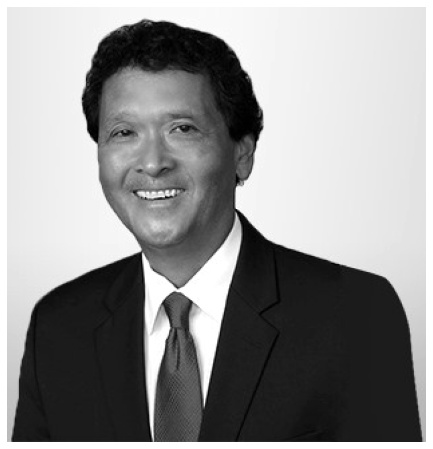

In [52]:
RON = Image.open("Ron.jpg")
RON_gray = RON.convert('L') #azért hívtam segítségül ezt a csomagot hogy megszabaduljak a 3. RGB információkat tartalmazó dimenziótól
RON = np.array(RON_gray)
height, width = RON.shape
imshow(RON,cmap ="gray")
plt.axis('off')

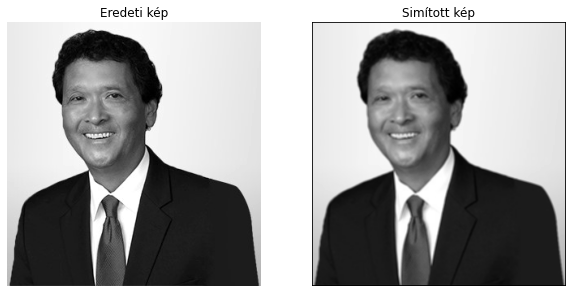

In [53]:
# Simítás átlagolással
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

#dimenziók
height, width = RON.shape

#új kép tárolása
smoothed_RON = np.zeros_like(RON)


for i in range(1, height - 1): #végig futok a képen
    for j in range(1, width - 1):
        neighborhood = RON[i - 1:i + 2, j - 1:j + 2] #megkeresem az adott kép pont körüli pixeleket
        smoothed_pixel = np.sum(neighborhood * kernel, axis=(0, 1)) #az előre definált kernellel kisimítom
        smoothed_RON[i, j] = smoothed_pixel

figure(figsize=(10, 10))
subplot(121), imshow(RON,cmap="gray"), title('Eredeti kép')
axis("off")
subplot(122), imshow(smoothed_RON,cmap ="gray"), title('Simított kép')
axis("off")
show()


(-0.5, 312.5, 324.5, -0.5)

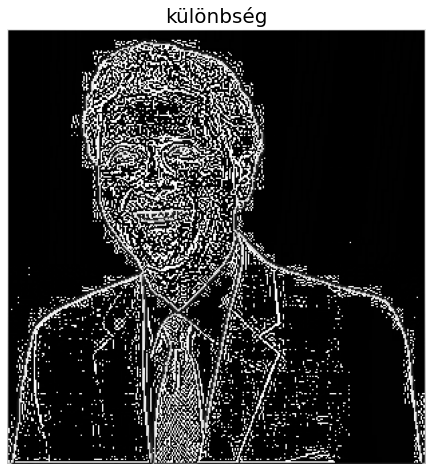

In [54]:
diff_img = np.abs(RON-smoothed_RON)# vettem a két kép pixeleinek abszolút különbségét
imshow(diff_img,cmap="gray") #a "fehéres" színnel kirajzol pixelek térnek el
title("különbség", size = 20)
axis("off")

Pontosan a simítás művelete látszódik, az éles körvonalak tűnnek el az eredeti képből.

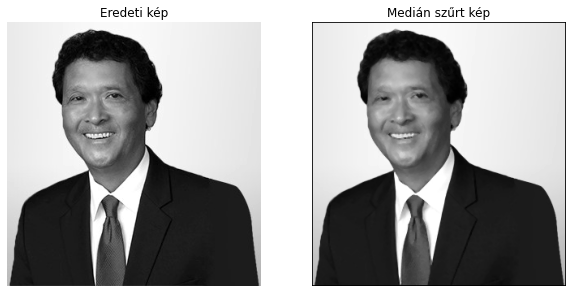

In [55]:
#medián szűrés

filtered_image = np.zeros_like(RON)
for i in range(1, height - 1):
    for j in range(1, width - 1): #előzőhőz hasonló módon megkerestem egy adott pixel szomszédos pixeleit, vettem a mediájukat és azzal helyettesítettem az eredetit
        neighborhood = RON[i-1:i+2, j-1:j+2]
        median_value = median(neighborhood)
        filtered_image[i, j] = median_value

# Eredeti és medián szűrt képek megjelenítése
figure(figsize=(10, 5))
subplot(121), imshow(RON, cmap ="gray"), title('Eredeti kép')
axis("off")
subplot(122), imshow(filtered_image, cmap = "gray"), title('Medián szűrt kép')
axis("off")
show()


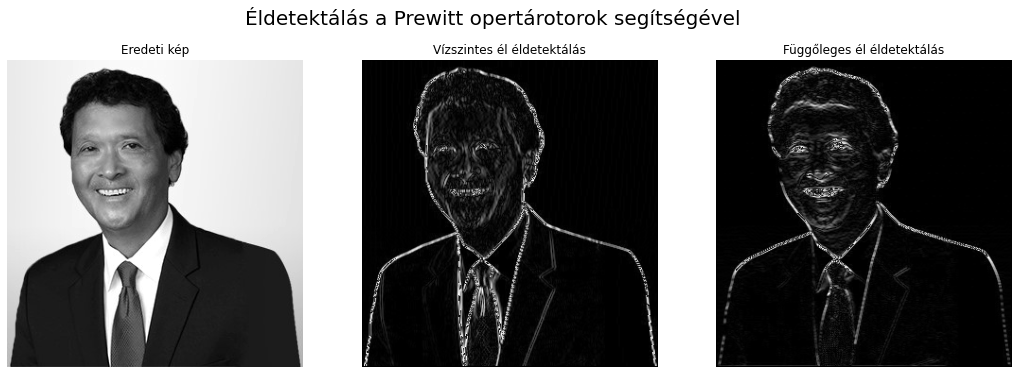

In [56]:
#forrás: https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html

horizontal_edge_detected = np.zeros_like(RON)
vertical_edge_detected = np.zeros_like(RON)


horizontal_edge_kernel = np.array([[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]])
                                                    #prewitt opertorok 

vertical_edge_kernel = np.array([[-1, -1, -1],
                                 [0, 0, 0],
                                 [1, 1, 1]])

#vízszintes
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = RON[i - 1:i + 2, j - 1:j + 2]
        edge_value = np.sum(neighborhood * horizontal_edge_kernel) #mint a simításnál csak most prewitt operátorokkal szorzok a siító kernel helyett
        horizontal_edge_detected[i, j] = np.abs(edge_value)

#függőleges 
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = RON[i - 1:i + 2, j - 1:j + 2]
        edge_value = np.sum(neighborhood * vertical_edge_kernel)
        vertical_edge_detected[i, j] = np.abs(edge_value)

# Eredeti kép és éldetektált képek megjelenítése
figure(figsize=(18, 6))
suptitle("Éldetektálás a Prewitt opertárotorok segítségével", size = 20)
subplot(131), imshow(RON, cmap='gray'), title('Eredeti kép')
axis("off")
subplot(132), imshow(horizontal_edge_detected, cmap='gray'), title('Vízszintes él éldetektálás')
axis("off")
subplot(133), imshow(vertical_edge_detected, cmap='gray'), title('Függőleges él éldetektálás')
axis("off")
show()


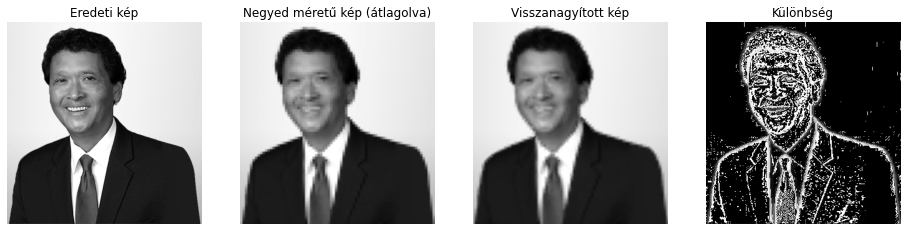

In [57]:
RON = Image.open("Ron.jpg")
RON_gray = RON.convert('L') #meg kellett hívnom újra hogy működjön
RON = np.array(RON_gray)

# Kép negyed méretűre csökkentése átlagolással

scaled_height, scaled_width = height // 4, width // 4

scaled_image = np.zeros((scaled_height, scaled_width), dtype=np.uint8)

for i in range(scaled_height):
    for j in range(scaled_width):
        average_color = mean(RON[i * 4:(i + 1) * 4, j * 4:(j + 1) * 4], axis=(0, 1)) #4x4 blokkok átlagával töltöm fel a kicsinyített képet
        scaled_image[i, j] = average_color

x = np.arange(0, scaled_width)
y = np.arange(0, scaled_height) #definiálok a kicsinített képhez
x_new = linspace(0, scaled_width - 1, width) 
y_new = linspace(0, scaled_height - 1, height)

X, Y = np.meshgrid(x, y)#illetve az eredti méretű képhez egy koordinátarendszert
X_new, Y_new = np.meshgrid(x_new, y_new)

points = np.column_stack((X.flatten(), Y.flatten())) #átrendezem az alakjukat, hogy tudjam haszálni a griddata 2D-s interpolátort
values = scaled_image.reshape((-1))

upscaled_image1 = griddata(points, values, (X_new, Y_new), method='linear') #két különböző módszert alkalmazva is megvizsgáltam az eredményt
upscaled_image1 = upscaled_image1.astype(np.uint8)

upscaled_image2 = griddata(points, values, (X_new, Y_new), method='cubic') #http://www.ece.northwestern.edu/local-apps/matlabhelp/techdoc/ref/griddata.html - griddata dokumentáció
upscaled_image2 = upscaled_image2.astype(np.uint8)


difference_image1 = np.abs(RON - upscaled_image1) #az eredeti és visszanagyított képek különbségét is megvizsgáltam
difference_image2 = np.abs(RON - upscaled_image2)


plt.figure(figsize=(16, 8))
plt.subplot(141), plt.imshow(RON,cmap = "gray"), plt.title('Eredeti kép')
plt.axis("off")
plt.subplot(142), plt.imshow(scaled_image,cmap = "gray"), plt.title('Negyed méretű kép (átlagolva)')
plt.axis("off")
plt.subplot(143), plt.imshow(upscaled_image1, cmap = "gray"), plt.title('Visszanagyított kép')
plt.axis("off")
plt.subplot(144), plt.imshow(difference_image1, cmap = "gray"), plt.title('Különbség')
plt.axis("off")
plt.show()


(-0.5, 312.5, 324.5, -0.5)

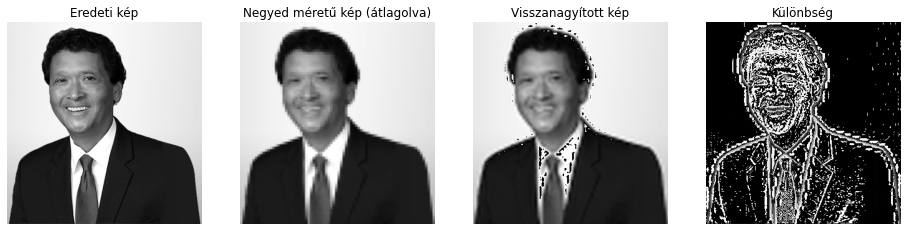

In [58]:
plt.figure(figsize=(16, 8))
plt.subplot(141), plt.imshow(RON, cmap ="gray"), plt.title('Eredeti kép')
plt.axis("off")
plt.subplot(142), plt.imshow(scaled_image,cmap = "gray"), plt.title('Negyed méretű kép (átlagolva)')
plt.axis("off")
plt.subplot(143), plt.imshow(upscaled_image2, cmap ="gray"), plt.title('Visszanagyított kép')
plt.axis("off")
plt.subplot(144), plt.imshow(difference_image2, cmap ="gray"), plt.title('Különbség')
plt.axis("off")

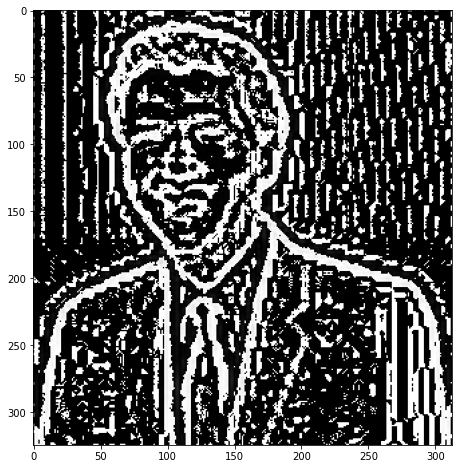

In [59]:
difference_proba = np.abs(upscaled_image2 - upscaled_image1) #a két nagyítás közti különbség
plt.imshow(difference_proba, cmap = "gray")

A lineáris interpolációval végzett visszanagyítás szebben adta vissza az eredeti képünket viszont roszabb minőségben. Míg a köbös interpoláció sok hibát vétett, de élesebb ereményt kpatunk vissza.

# logaritmikusan

In [60]:
RON = Image.open("Ron.jpg")
RON_gray = RON.convert('L') #azért hívtam segítségül ezt a csomagot hogy megszabaduljak a 3. RGB információkat tartalmazó dimenziótól
RON2 = np.array(RON_gray)

In [61]:
# Kiválogattam a nem nulla értékeket
non_zero_indices = RON2 > 0
log_RON = np.zeros_like(RON2, dtype = float) #csináltam egy eredeti méretű arryt floatokkal
log_RON[non_zero_indices] = np.log(RON2[non_zero_indices]) # a nulla értékeket nullának hagytam míg a többit logaritmizáltam

(-0.5, 312.5, 324.5, -0.5)

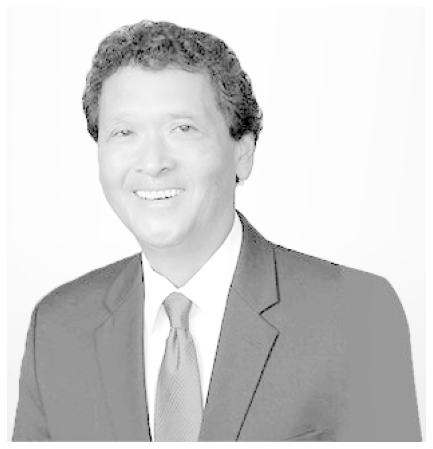

In [62]:
plt.imshow(log_RON,cmap="gray")
plt.axis('off')

Az első tapasztalatom az az, hogy kifakult a kép.

## simítás

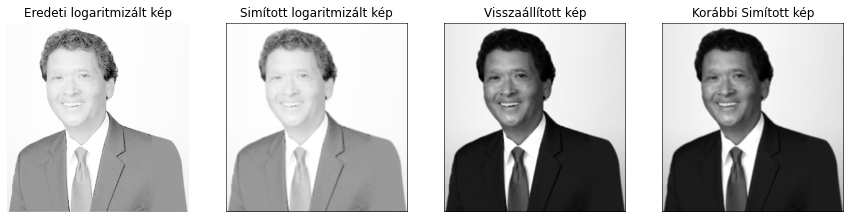

In [63]:
# Simítás kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9


height, width = log_RON.shape


smoothed_log_RON = np.zeros_like(log_RON)


for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = log_RON[i - 1:i + 2, j - 1:j + 2]
        smoothed_pixel = np.sum(neighborhood * kernel)
        smoothed_log_RON[i, j] = smoothed_pixel

        
restored_RON = np.exp(smoothed_log_RON) #vissza hatványozom


plt.figure(figsize=(15, 5))
plt.subplot(141), plt.imshow(log_RON, cmap='gray'), plt.title('Eredeti logaritmizált kép')
plt.axis("off")
plt.subplot(142), plt.imshow(smoothed_log_RON, cmap='gray'), plt.title('Simított logaritmizált kép')
plt.axis("off")
plt.subplot(143), plt.imshow(restored_RON, cmap='gray'), plt.title('Visszaállított kép')
plt.axis("off")
plt.subplot(144), plt.imshow(smoothed_RON, cmap='gray'), plt.title('Korábbi Simított kép')
plt.axis("off")
plt.show()

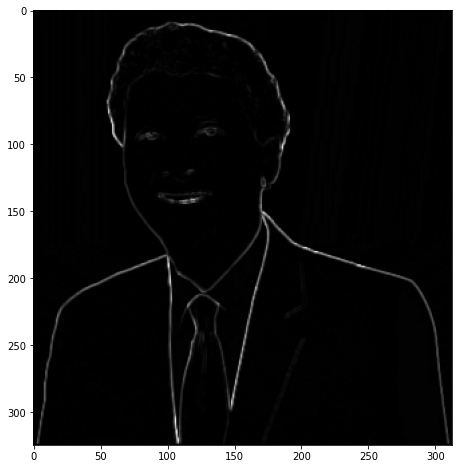

In [64]:
sim_diff = np.abs(restored_RON-smoothed_RON) #a logaritmikus simítás után visszahatványozott és az eredeti simítás közti különbség
plt.imshow(sim_diff,cmap="gray")

A logaritmikus képből visszaálított kép élesebb eredményt ad vissza, mert mint látjuk a különbségük pont a körvonalakat emeli ki, tehát ott az eltérés a két eredmény között.

## Az eredeti és a simított kép különbsége:

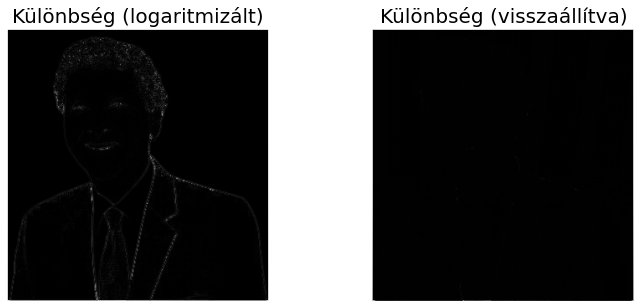

In [65]:

diff_img_log = np.abs(log_RON - smoothed_log_RON)
exp_err = np.where(diff_img_log == 0, 0, np.exp(diff_img_log)).astype(uint8)# Vissza skálázzuk

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(diff_img_log, cmap="gray")
plt.title("Különbség (logaritmizált)", size=20)
plt.axis("off")

plt.subplot(122)
plt.imshow(exp_err, cmap="gray",vmin=0, vmax=255)
plt.title("Különbség (visszaállítva)", size=20)
plt.axis("off")

plt.show()


Szemmel láthatóan kisebb a különbség mint az első esetben, és amikor az eredményt megpróbáltam visszahatványozni azt kaptam eredményül, hogy "nincs" különbség.

In [66]:
exp_err

array([[232, 232, 232, ..., 228, 228, 228],
       [232,   0,   0, ...,   1,   0, 228],
       [232,   0,   0, ...,   1,   0, 228],
       ...,
       [189,   1,   1, ...,   1,   1, 179],
       [183,   1,   1, ...,   1,   1, 176],
       [186, 188, 189, ..., 121, 174, 176]], dtype=uint8)

In [67]:
diff_img

array([[233, 233, 233, ..., 229, 229, 229],
       [233,   1,   1, ...,   0,   0, 229],
       [233,   1,   1, ...,   0,   0, 229],
       ...,
       [189, 255,  32, ...,  17,  14, 179],
       [183, 249,  28, ...,  18,  17, 177],
       [187, 188, 190, ..., 121, 174, 177]], dtype=uint8)

Össze hasonlítottam a másik különbséges mátrixxal, és nagyjából hasonló értékek, még se jelenik meg a ploton.

## Élkeresés:

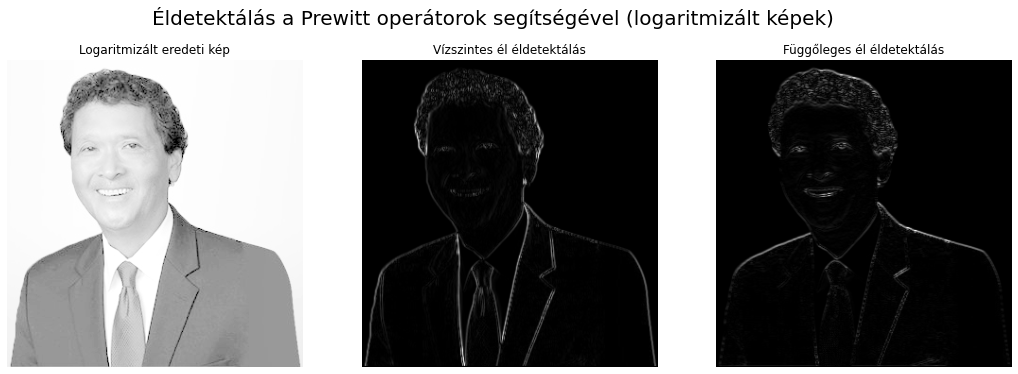

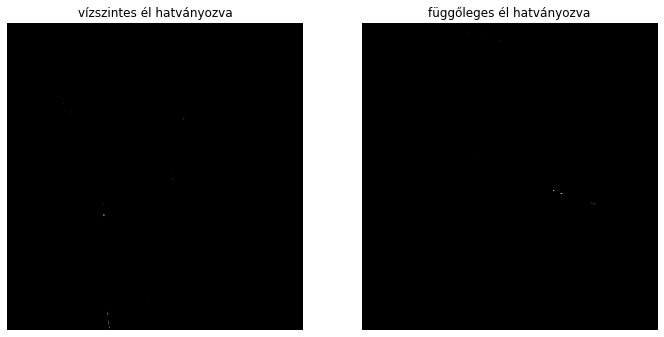

In [68]:

horizontal_edge_kernel = np.array([[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]])


vertical_edge_kernel = np.array([[-1, -1, -1],
                                 [0, 0, 0],
                                 [1, 1, 1]])


horizontal_edge_detected_log = np.zeros_like(log_RON)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = log_RON[i - 1:i + 2, j - 1:j + 2]
        edge_value = np.sum(neighborhood * horizontal_edge_kernel)
        horizontal_edge_detected_log[i, j] = np.abs(edge_value)


vertical_edge_detected_log = np.zeros_like(log_RON)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = log_RON[i - 1:i + 2, j - 1:j + 2]
        edge_value = np.sum(neighborhood * vertical_edge_kernel)
        vertical_edge_detected_log[i, j] = np.abs(edge_value)


exp1 = np.exp(horizontal_edge_detected_log)
exp2 = np.exp(vertical_edge_detected_log)


plt.figure(figsize=(18, 6))
plt.suptitle("Éldetektálás a Prewitt operátorok segítségével (logaritmizált képek)", size=20)
plt.subplot(131), plt.imshow(log_RON, cmap='gray'), plt.title('Logaritmizált eredeti kép')
plt.axis("off")
plt.subplot(132), plt.imshow(horizontal_edge_detected_log, cmap='gray'), plt.title('Vízszintes él éldetektálás')
plt.axis("off")
plt.subplot(133), plt.imshow(vertical_edge_detected_log, cmap='gray'), plt.title('Függőleges él éldetektálás')
plt.axis("off")

plt.figure(figsize=(18, 6))
plt.subplot(131), plt.imshow(exp1, cmap='gray'), plt.title('vízszintes él hatványozva')
plt.axis("off")
plt.subplot(132), plt.imshow(exp2, cmap='gray'), plt.title('függőleges él hatványozva')
plt.axis("off")
plt.show()


A logaritmikus alakban megtalált élek, visszahatványozás után szintén eltűntek. Egy-két pont maradt csak meg belőlük.

## medián szűrés:

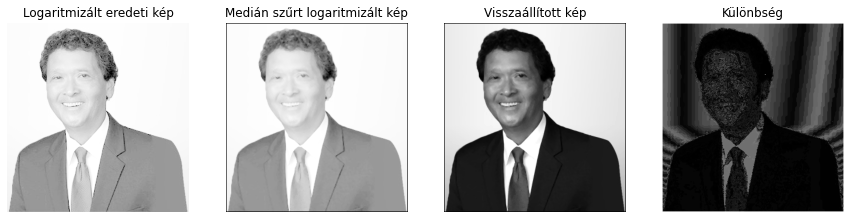

In [69]:

filtered_log_RON = np.zeros_like(log_RON)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        neighborhood = log_RON[i - 1:i + 2, j - 1:j + 2]
        median_value = np.median(neighborhood)
        filtered_log_RON[i, j] = median_value

reconstruct = np.exp(filtered_log_RON) 
diff_median = np.abs(reconstruct-filtered_image)

figure(figsize=(15, 5))
subplot(141), imshow(log_RON, cmap="gray"), title('Logaritmizált eredeti kép')
axis("off")
subplot(142), imshow(filtered_log_RON, cmap="gray"), title('Medián szűrt logaritmizált kép')
axis("off")
subplot(143), imshow(reconstruct, cmap="gray"), title('Visszaállított kép')
axis("off")
subplot(144), imshow(diff_median, cmap="gray"), title('Különbség')
axis("off")
show()


## skálázás:

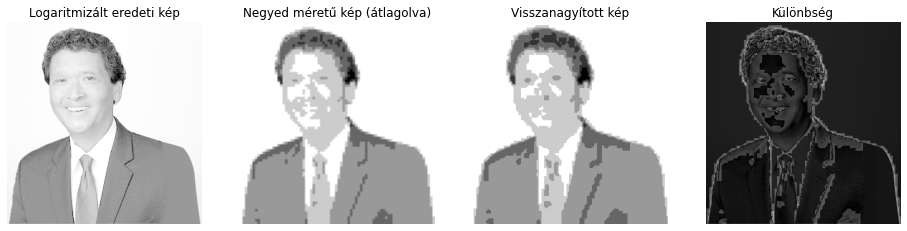

In [70]:
# Kép negyed méretűre csökkentése átlagolással
height, width = log_RON.shape
scaled_height, scaled_width = height // 4, width // 4

scaled_image = np.zeros((scaled_height, scaled_width), dtype=np.uint8)

for i in range(scaled_height):
    for j in range(scaled_width):
        average_color = mean(log_RON[i * 4:(i + 1) * 4, j * 4:(j + 1) * 4], axis=(0, 1))
        scaled_image[i, j] = average_color

x = np.arange(0, scaled_width)
y = np.arange(0, scaled_height)
x_new = np.linspace(0, scaled_width - 1, width)
y_new = np.linspace(0, scaled_height - 1, height)

X, Y = np.meshgrid(x, y)
X_new, Y_new = np.meshgrid(x_new, y_new)

points = np.column_stack((X.flatten(), Y.flatten()))
values = scaled_image.reshape((-1))

upscaled_image1 = griddata(points, values, (X_new, Y_new), method='linear')
upscaled_image1 = upscaled_image1.astype(np.uint8)

upscaled_image2 = griddata(points, values, (X_new, Y_new), method='cubic')
upscaled_image2 = upscaled_image2.astype(np.uint8)

difference_image1 = np.abs(log_RON - upscaled_image1)
difference_image2 = np.abs(log_RON - upscaled_image2)


figure(figsize=(16, 8))
subplot(141), imshow(log_RON, cmap="gray"), title('Logaritmizált eredeti kép')
axis("off")
subplot(142), imshow(scaled_image, cmap="gray"), title('Negyed méretű kép (átlagolva)')
axis("off")
subplot(143), imshow(upscaled_image1, cmap="gray"), title('Visszanagyított kép')
axis("off")
subplot(144), imshow(difference_image1, cmap="gray"), title('Különbség')
axis("off")
show()


(-0.5, 312.5, 324.5, -0.5)

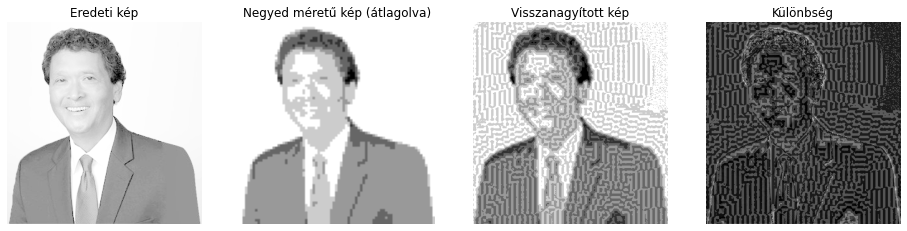

In [71]:
figure(figsize=(16, 8))
subplot(141), plt.imshow(log_RON, cmap ="gray"), plt.title('Eredeti kép')
axis("off")
subplot(142), plt.imshow(scaled_image,cmap = "gray"), plt.title('Negyed méretű kép (átlagolva)')
axis("off")
subplot(143), plt.imshow(upscaled_image2, cmap ="gray"), plt.title('Visszanagyított kép')
axis("off")
subplot(144), plt.imshow(difference_image2, cmap ="gray"), plt.title('Különbség')
axis("off")

A lineáris interpoláció a körvonalakat még csak-csak eltalálja, viszont a köbös az már teljesen elveszti a fonalat.